In [15]:
%matplotlib inline
import mpld3
import requests
import numpy as np
import concurrent.futures
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize, scipy.stats
mpld3.enable_notebook()

In [16]:
def dets(n, m, t, randfunc = np.random.rand):
    y = np.array([np.linalg.det(np.abs(randfunc(n,n))) for x in range(m)])
    z = np.abs(y)
    return z[z < t]

In [17]:
def traces(n, m, t, randfunc = np.random.rand):
    y = np.array([np.trace(randfunc(n,n)) for x in range(m)])
    z = np.abs(y)
    return z[z < t]

In [18]:
def plaw(x, a, k):
    return a * np.power(x, k)

def expon(x, a, k):
    return a * np.exp(-k * x)

def tdist(x, a, k):
    return a*scipy.stats.t.pdf(x, k)

def gauss(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

In [20]:
def plothist(determinants, noscale = False):
    hist, bins = np.histogram(determinants, 120)
    hist_norm = hist / hist.sum()
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    tdistfit = scipy.optimize.curve_fit(tdist, center, hist_norm)
    exponfit = scipy.optimize.curve_fit(expon, center, hist_norm)
    lw = 4
    α = 0.7
    fig, ax = plt.subplots(1, 1, figsize = (16,4))
    ax.bar(center, hist_norm, align = 'center', width = width, color = '#222244', edgecolor = '#ff0000')
    ax.plot(center, tdist(center, tdistfit[0][0], tdistfit[0][1]), lw = lw, color = '#44aaff', label = 'Too High', alpha = 0.5, ls = '--')
    plt.axvline(x = determinants.mean(), lw = lw+2, color = '#222244', label = 'Just Right', alpha = 0.9)
    ax.plot(center, expon(center, exponfit[0][0], exponfit[0][1]), lw = lw, color = '#226688', label = 'Too Low', alpha = 0.9)
    ax.set_title('Random Fucking Matrices')
    ax.set_ylabel('Sampling Density')
    ax.set_xlabel('Determinant')
    if not noscale:
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
        ax.set_ylim((0,0.13))
    ax.grid(which='both')
    ax.legend()

In [21]:
def plothist_traces(traces, noscale = False):
    hist, bins = np.histogram(traces, 120)
    hist_norm = hist / hist.sum()
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    gaussfit = scipy.optimize.curve_fit(gauss, center, hist_norm)
    exponfit = scipy.optimize.curve_fit(expon, center, hist_norm)
    lw = 4
    α = 0.5
    fig, ax = plt.subplots(1, 1, figsize = (16,2))
    ax.bar(center, hist_norm, align = 'center', width = width, color = '#222244', edgecolor = '#ff0000')
    ax.plot(center, gauss(center, gaussfit[0][0], gaussfit[0][1], gaussfit[0][2]), lw = lw-1, color = '#44aaff', label = 'Gaussian', alpha = α)
    ax.set_ylabel('Sampling Density')
    ax.set_xlabel('Trace')
    if not noscale:
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
        #ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
        #ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
        ax.set_ylim((0,0.03))
        #ax.set_xlim((0,7))
    ax.grid(which='both')
    ax.legend()

In [13]:
plothist(dets(20, 10**5, 0.2))

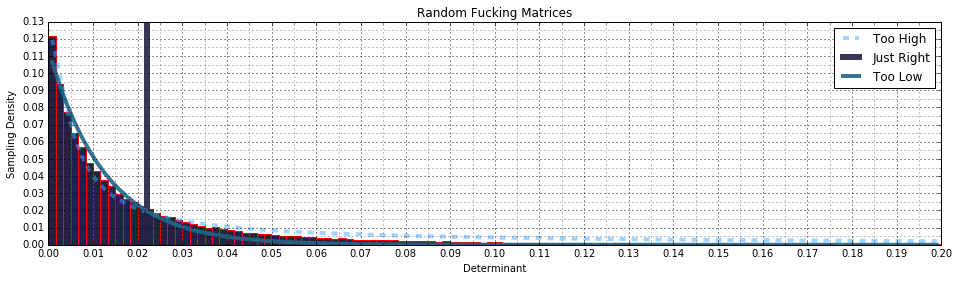

In [22]:
plothist(dets(12, 10**5, 0.2))

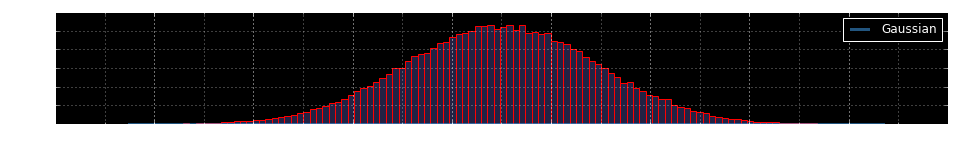

In [311]:
plothist_traces(traces(11, 10**5, 10))

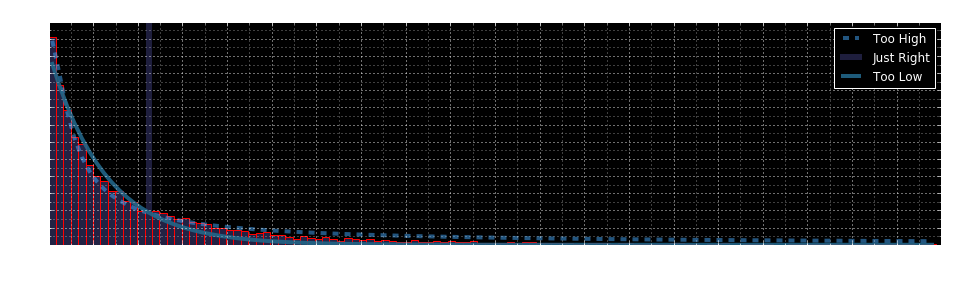

In [436]:
plothist(dets(11, 10**4, 0.2))

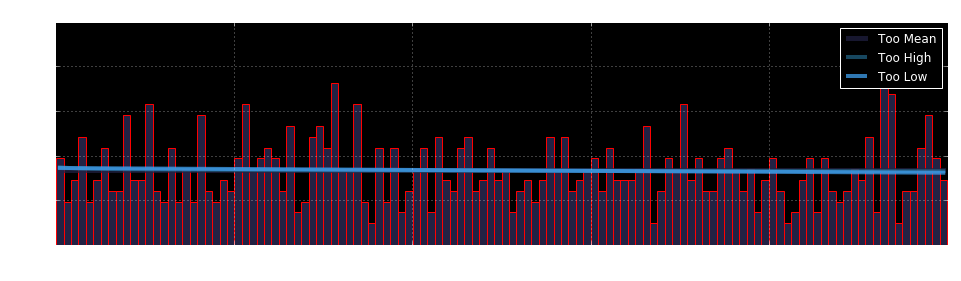

In [329]:
plothist(dets(11, 10**5, 10, randfunc = np.random.randn), noscale = True)

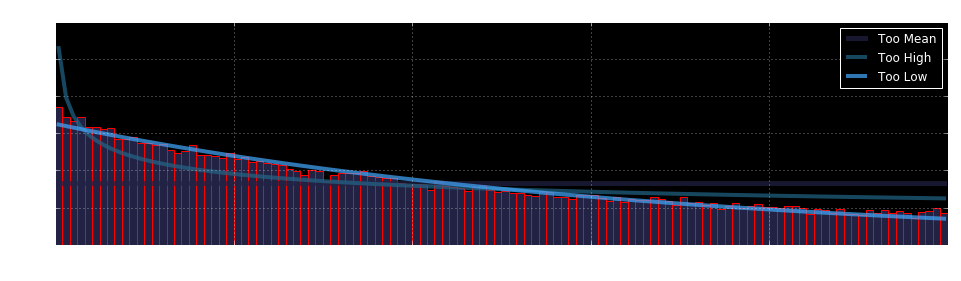

In [324]:
plothist(dets(6, 10**5, 10, randfunc = np.random.randn), noscale = True)

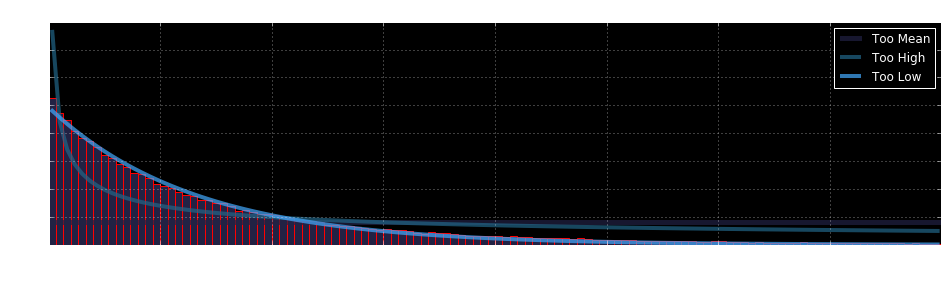

In [328]:
plothist(dets(3, 10**5, 8, randfunc = np.random.randn), noscale = True)

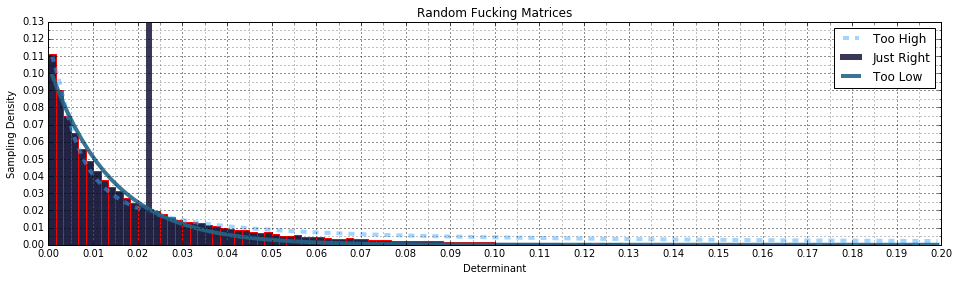

In [23]:
plothist(dets(10, 10**5, 0.2))

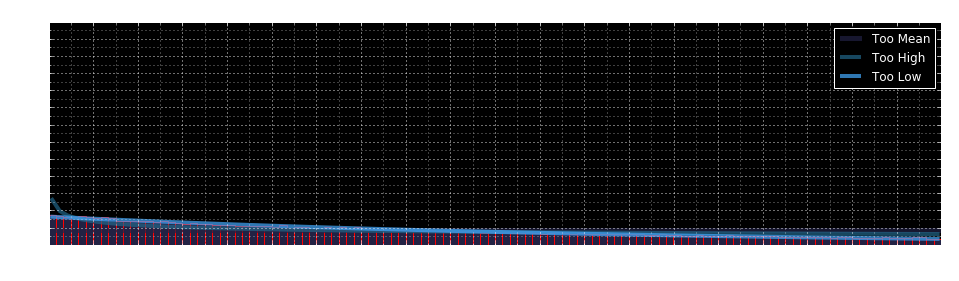

In [215]:
plothist(dets(3, 10**5, 0.2))

In [ ]:
# Ideas: 
# Violin or Box plots of varying matrix size.
# Stacked area plots of varying matrix size.
# Iterate through many curve fits of various functions, function iterator wrappers for scipy.stats.

In [24]:
def violin_data(n = 6, m = 3*10**4, t = 0.5, afunc = None, randfunc = np.random.rand):
        if not afunc:
            afunc = dets
        data = []
        for n in range(2, n + 1):
            data += [afunc(n, m, t, randfunc)]
        return data

In [25]:
def plotviolin(data, noscale = False):
    fig, ax = plt.subplots(1, 1, figsize = (16,4))
    udim = len(data) + 2
    violin_posn = range(2, udim)
    violin_parts = ax.violinplot(data, violin_posn, widths = 0.9)
    ax.set_ylabel('Determinant')
    ax.set_xlabel('Dimension')
    if not noscale:
        ax.set_ylim((-0.1, 0.6))
        ax.set_xlim((1, udim))
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
    ax.grid(which='both')
    ax.set_xticks(violin_posn)
    for pc in violin_parts['bodies']:
        pc.set_facecolor('#4488ee')
        pc.set_edgecolor('#88ccff')

In [26]:
def plotviolin_traces(data, noscale = False):
    fig, ax = plt.subplots(1, 1, figsize = (16,2))
    udim = len(data) + 2
    violin_posn = range(2, udim)
    violin_parts = ax.violinplot(data, violin_posn, widths = 0.9)
    ax.set_ylabel('Trace')
    ax.set_xlabel('Dimension')
    if not noscale:
        ax.set_ylim((-0.1, udim*0.7 - (udim*0.7 % 10)))
        ax.set_xlim((1, udim))
        #ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(4))
        #ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(5))
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))
    ax.grid(which='both')
    ax.set_xticks(violin_posn)
    for pc in violin_parts['bodies']:
        pc.set_facecolor('#4488ee')
        pc.set_edgecolor('#88ccff')

In [301]:
vdattr = violin_data(28, 10**4, 100, traces)

In [27]:
vdattr = violin_data(12, 10**4, 100, traces)

TypeError: 2 is not JSON serializable

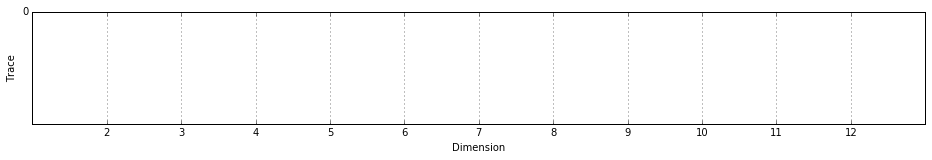

In [28]:
plotviolin_traces(vdattr)

In [350]:
vdatn = violin_data(12, 10**5, 24, randfunc = np.random.randn)

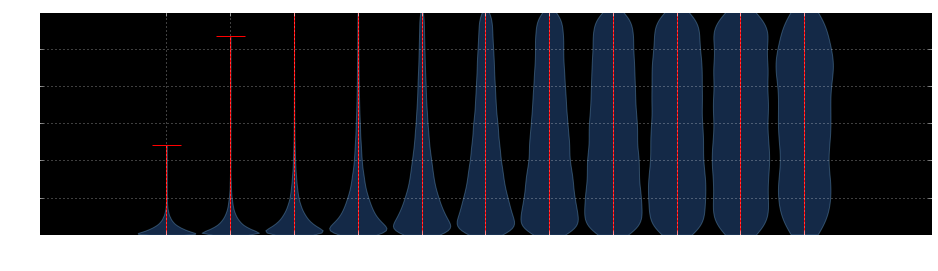

In [345]:
plotviolin(vdatn, noscale = True)

In [185]:
vdat = violin_data(28, 10**5)

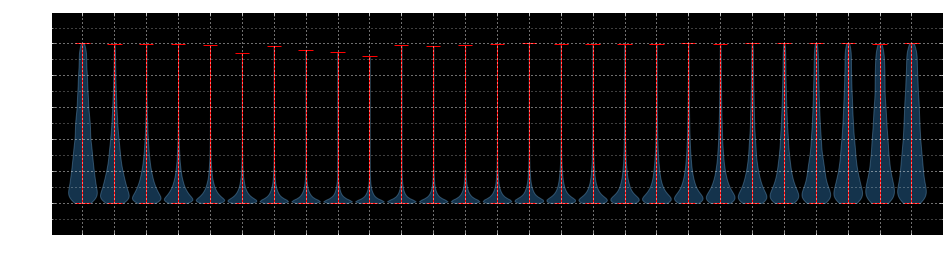

In [175]:
plotviolin(vdat)

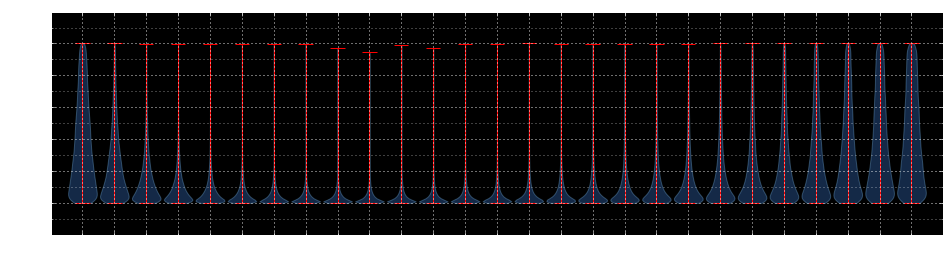

In [187]:
plotviolin(vdat)

In [353]:
violin_means = np.array([x.mean() for x in vdat])
violin_means.mean(), np.argmin(violin_means) + 2, violin_means[np.argmin(violin_means)]

(0.080114320301707301, 11, 0.023461722227668062)

In [354]:
violin_means.mean()

0.080114320301707301

In [355]:
np.argmin(violin_means.mean())

0

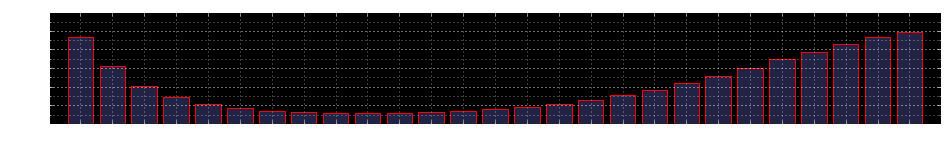

In [380]:
fig, ax = plt.subplots(1,1,figsize=(16,2))
udim = len(violin_means) + 2
bar_posn = np.arange(2, udim) - 0.4
bar_parts = ax.bar(bar_posn, violin_means, color = '#222244', edgecolor = '#ff0000')
ax.set_ylabel('Mean Determinant')
ax.set_xlabel('Dimension')
ax.set_ylim((0, 0.24))
ax.set_xlim((1, udim))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.02))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.04))
ax.set_xticks(np.arange(2, udim))
ax.grid(which='both')

In [ ]:
def dets(n, m, t):
    y = np.array([np.linalg.det(np.random.rand(n,n)) for x in range(m)])
    z = np.abs(y)
    return z[z < t]

def plotstack(determinants):
    hist, bins = np.histogram(determinants, 120)
    hist_norm = hist / hist.sum()
    width = (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plfit = scipy.optimize.curve_fit(plaw, center, hist_norm)
    exponfit = scipy.optimize.curve_fit(expon, center, hist_norm)
    lw = 4
    α = 0.7
    fig, ax = plt.subplots(1, 1, figsize = (16,4))
    ax.bar(center, hist_norm, align = 'center', width = width, color = '#222244')
    ax.plot(center, np.ones(hist_norm.shape[0]) * hist_norm.mean(), lw = lw+1, color = '#222244', label = 'Too Mean', alpha = α)
    ax.plot(center, plaw(center, plfit[0][0], plfit[0][1]), lw = lw, color = '#226688', label = 'Too High', alpha = α)
    ax.plot(center, expon(center, exponfit[0][0], exponfit[0][1]), lw = lw, color = '#44aaff', label = 'Too Low', alpha = α)
    ax.set_title('Random Fucking Matrices')
    ax.set_ylabel('Sampling Density')
    ax.set_xlabel('Determinant')
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.005))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.01))
    ax.set_ylim((0,0.1))
    ax.grid(which='both')
    ax.legend()

In [ ]:
dat = arxiv.query('eleven', start = 0, max_results = 1000)

In [ ]:
http://arxiv.org/find/all/1/abs:+eleven/0/1/0/past/0/1?per_page=100

In [397]:
base_arxiv = 'http://export.arxiv.org/api/query?'

def arxiv_get(query):
    dat = requests.get(base_arxiv + query)
    return dat#feedparser.parse(dat)


In [398]:
dat = arxiv_get('search_query=abs:+eleven&per_page=1000')

In [407]:
type(dat.text.encode('utf-8'))

bytes

In [409]:
feedparser.parse(dat.text.encode('utf-8', errors = 'replace'))

TypeError: 'str' does not support the buffer interface

In [382]:
help(arxiv.query)

Help on function query in module arxiv.arxiv:

query(s, prune=True, start=0, max_results=10)
    # TODO: Field queries ("Details of Query Construction")
    # TODO: Do I want to support boolean operators?
    # TODO: Do I want to add support for quotes to group words/order of ops?

